# **Air Quality Index Anomaly Detection**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#anomali library
from sklearn.ensemble import IsolationForest


# **Load Dataset**

In [2]:
#load dataset
aq = pd.read_csv("/content/aqi.csv")

# Exploring the **Dataset**

In [3]:
aq.head(3)

,date,state,area,number_of_monitoring_stations,prominent_pollutants,aqi_value,air_quality_status,unit,note
0,30-04-2025,Maharashtra,Amravati,2,PM10,78,Satisfactory,number_of_monitoring_stations in Absolute Numb...,NaN
1,30-04-2025,Bihar,Purnia,1,CO,56,Satisfactory,number_of_monitoring_stations in Absolute Numb...,NaN
2,30-04-2025,Madhya Pradesh,Katni,1,O3,98,Satisfactory,number_of_monitoring_stations in Absolute Numb...,NaN


In [4]:
aq.shape

(235785, 9)

In [5]:
#Data variables
aq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235785 entries, 0 to 235784
Data columns (total 9 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   date                           235785 non-null  object 
 1   state                          235785 non-null  object 
 2   area                           235785 non-null  object 
 3   number_of_monitoring_stations  235785 non-null  int64  
 4   prominent_pollutants           235785 non-null  object 
 5   aqi_value                      235785 non-null  int64  
 6   air_quality_status             235785 non-null  object 
 7   unit                           235785 non-null  object 
 8   note                           0 non-null       float64
dtypes: float64(1), int64(2), object(6)
memory usage: 16.2+ MB


In [6]:
#formating the date to actual date and time datatype
aq["date"] = pd.to_datetime(aq["date"], format='%d-%m-%Y', errors="coerce")



In [7]:
aq.drop(columns=["unit", "note"], inplace = True )

In [8]:
aq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235785 entries, 0 to 235784
Data columns (total 7 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   date                           235785 non-null  datetime64[ns]
 1   state                          235785 non-null  object        
 2   area                           235785 non-null  object        
 3   number_of_monitoring_stations  235785 non-null  int64         
 4   prominent_pollutants           235785 non-null  object        
 5   aqi_value                      235785 non-null  int64         
 6   air_quality_status             235785 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 12.6+ MB


In [9]:
#number of state
aq["state"].nunique()

32

In [10]:
#states
aq["state"].unique()

array(['Maharashtra', 'Bihar', 'Madhya Pradesh', 'Chhattisgarh', 'Assam',
       'Manipur', 'Kerala', 'West Bengal', 'Odisha', 'Karnataka',
       'Gujarat', 'Uttarakhand', 'Tamil Nadu', 'Andhra Pradesh',
       'Rajasthan', 'Uttar Pradesh', 'Punjab', 'Mizoram', 'Chandigarh',
       'Telangana', 'Puducherry', 'Meghalaya', 'Himachal Pradesh',
       'Jharkhand', 'Haryana', 'Arunachal Pradesh', 'Nagaland', 'Tripura',
       'Delhi', 'Andaman and Nicobar Islands', 'Sikkim',
       'Jammu and Kashmir'], dtype=object)

In [11]:
aq["prominent_pollutants"].nunique()

49

In [12]:
aq["prominent_pollutants"].unique()

array(['PM10', 'CO', 'O3', 'PM2.5', 'SO2', 'PM2.5,PM10', 'PM10,NO2',
       'PM10,O3', 'O3,PM2.5,PM10', 'PM10,O3,CO', 'PM10,CO', 'PM2.5,O3',
       'PM10,SO2', 'PM2.5,CO,O3', 'NO2', 'PM10,PM2.5,NO2', 'CO,O3',
       'PM2.5,PM10,CO', 'PM2.5,SO2,O3', 'PM10,NO2,O3', 'SO2,O3',
       'PM10,NH3,CO', 'PM10,NO2,PM2.5,O3', 'NO2,PM10,CO', 'CO,SO2',
       'PM2.5,NO2', 'PM10,CO,SO2', 'PM2.5,NO2,SO2', 'PM10,SO2,O3',
       'PM10,NO2,SO3', 'PM2.5,NH3,O3', 'PM10,PM2.5,SO2', 'NO2,O3',
       'PM2.5,SO2', 'CO,NO2', 'NH3', 'PM2.5,CO,NO2', 'PM2.5,NH3',
       'NO2,SO2', 'PM2.5,CO,SO2', 'SO3,CO,O3', 'NO2,CO,O3', 'NO2,SO2,CO',
       'NO2,O3,SO2', 'PM10,NH3', 'NH3,CO,O3', 'PM10,NH3,O3', 'O3,NH3',
       'PM2.5,NH3,CO'], dtype=object)

In [13]:
aq["air_quality_status"].unique()

array(['Satisfactory', 'Moderate', 'Good', 'Poor', 'Very Poor', 'Severe'],
      dtype=object)

In [14]:
aq.head(3)

,date,state,area,number_of_monitoring_stations,prominent_pollutants,aqi_value,air_quality_status
0,2025-04-30,Maharashtra,Amravati,2,PM10,78,Satisfactory
1,2025-04-30,Bihar,Purnia,1,CO,56,Satisfactory
2,2025-04-30,Madhya Pradesh,Katni,1,O3,98,Satisfactory


# **Exploratory Data Analysis**

In [15]:
aq.describe()

,date,number_of_monitoring_stations,aqi_value
count,235785,235785.000000,235785.000000
mean,2023-11-30 15:01:36.509956096,1.870653,111.127294
min,2022-04-01 00:00:00,1.000000,3.000000
25%,2023-03-23 00:00:00,1.000000,59.000000
50%,2023-12-20 00:00:00,1.000000,92.000000
75%,2024-08-26 00:00:00,1.000000,142.000000
max,2025-04-30 00:00:00,40.000000,500.000000
std,NaN,3.071575,71.447353


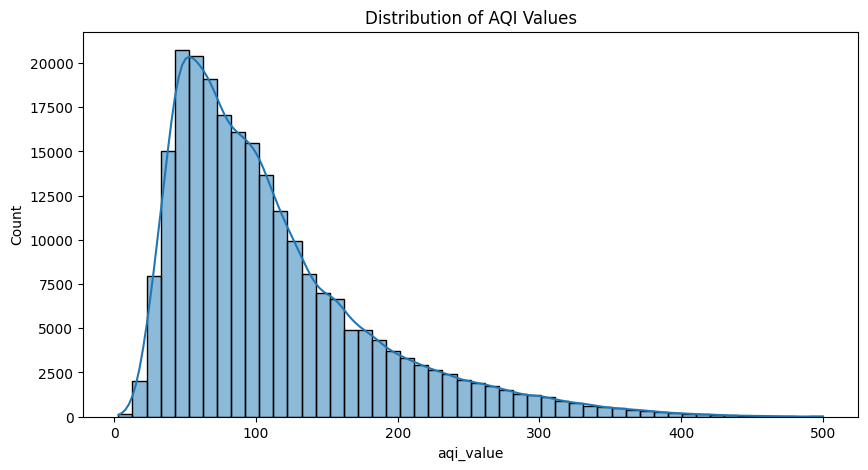

In [16]:
# Examine the aqi_value distribution
plt.figure(figsize=(10,5))
sns.histplot(aq["aqi_value"], bins=50, kde=True)
plt.title("Distribution of AQI Values")
plt.show()

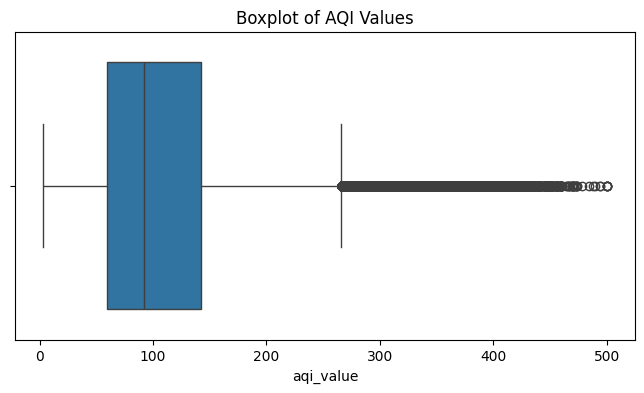

In [17]:
plt.figure(figsize=(8,4))
sns.boxplot(x=aq["aqi_value"])
plt.title("Boxplot of AQI Values")
plt.show()

In [18]:
aq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235785 entries, 0 to 235784
Data columns (total 7 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   date                           235785 non-null  datetime64[ns]
 1   state                          235785 non-null  object        
 2   area                           235785 non-null  object        
 3   number_of_monitoring_stations  235785 non-null  int64         
 4   prominent_pollutants           235785 non-null  object        
 5   aqi_value                      235785 non-null  int64         
 6   air_quality_status             235785 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 12.6+ MB


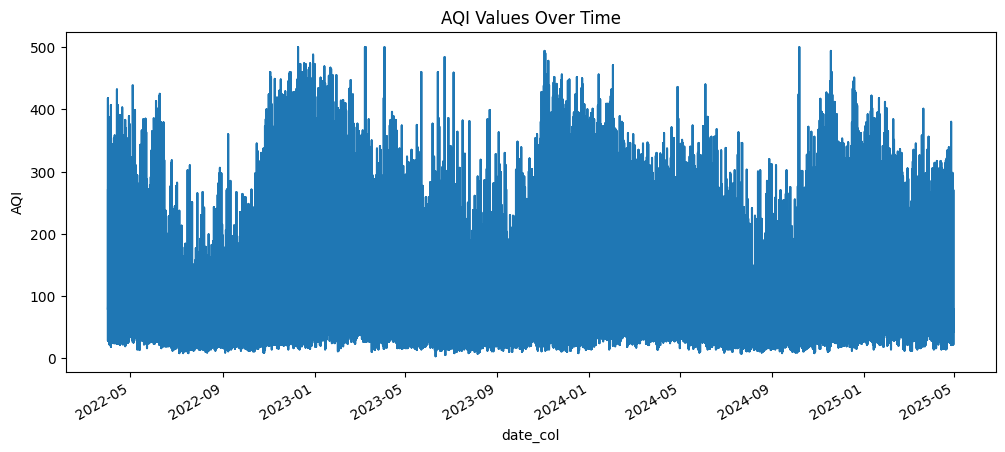

In [19]:
aq["date_col"] = aq["date"]
aq.set_index("date_col", inplace=True)

aq["aqi_value"].plot(figsize=(12,5))
plt.title("AQI Values Over Time")
plt.ylabel("AQI")
plt.show()


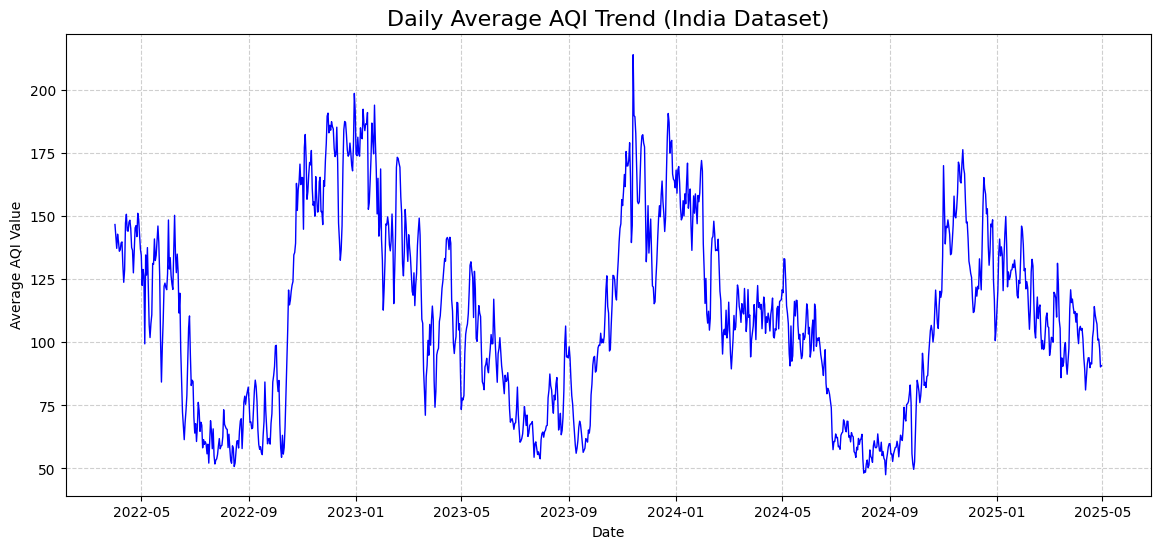

In [20]:
# Group by date and take mean AQI
aq_daily = aq.groupby("date")["aqi_value"].mean()

plt.figure(figsize=(14,6))
plt.plot(aq_daily.index, aq_daily.values, color="blue", linewidth=1)
plt.title("Daily Average AQI Trend (India Dataset)", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Average AQI Value")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

/tmp/ipython-input-2653134896.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="air_quality_status", y="aqi_value", data=aq, palette="Set2")


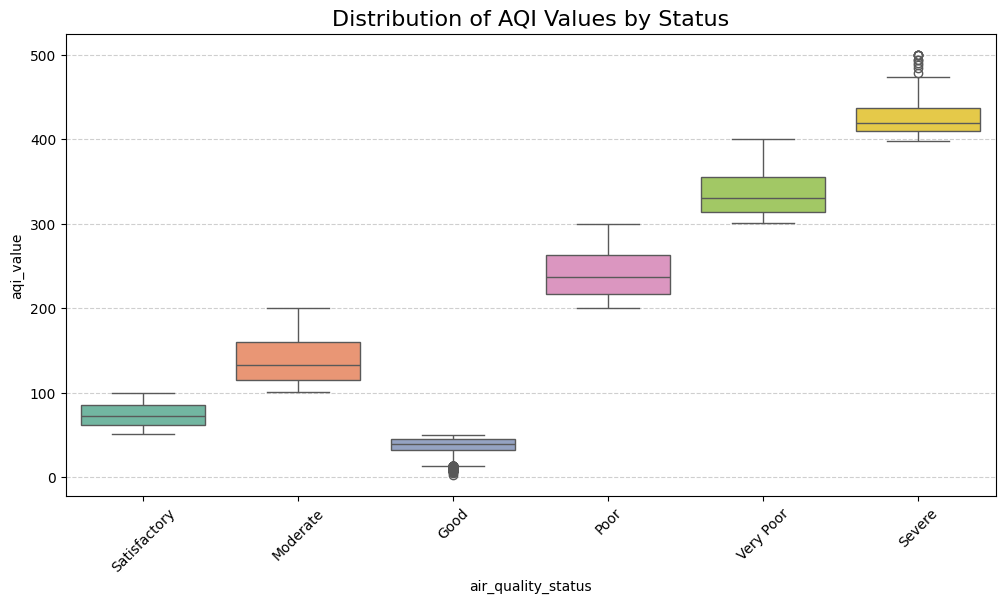

In [21]:
#distribution of aqi values by status
plt.figure(figsize=(12,6))
sns.boxplot(x="air_quality_status", y="aqi_value", data=aq, palette="Set2")
plt.title("Distribution of AQI Values by Status", fontsize=16)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()


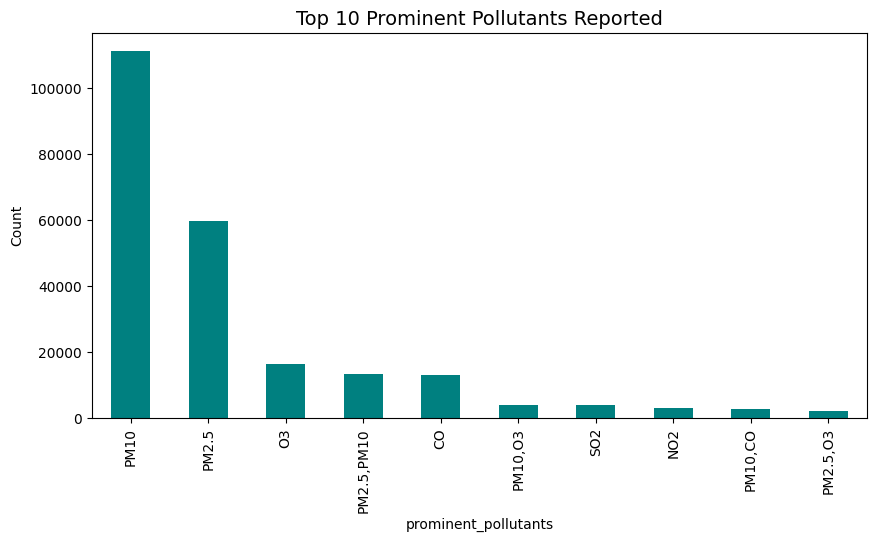

In [22]:
#ploting the highest 10 pollutants
aq["prominent_pollutants"].value_counts().head(10).plot(
    kind="bar", figsize=(10,5), color="teal"
)
plt.title("Top 10 Prominent Pollutants Reported", fontsize=14)
plt.ylabel("Count")
plt.show()


In [23]:
aq.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 235785 entries, 2025-04-30 to 2022-04-01
Data columns (total 7 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   date                           235785 non-null  datetime64[ns]
 1   state                          235785 non-null  object        
 2   area                           235785 non-null  object        
 3   number_of_monitoring_stations  235785 non-null  int64         
 4   prominent_pollutants           235785 non-null  object        
 5   aqi_value                      235785 non-null  int64         
 6   air_quality_status             235785 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(4)
memory usage: 14.4+ MB


# **Modeling**

 # **Anomaly Detection**

In [24]:
# Selecting feature
X = aq[["aqi_value"]]



In [25]:
# Fit Isolation Forest
iso = IsolationForest(
    contamination=0.02,  # assume ~2% anomalies
    random_state=42
)
aq["anomaly"] = iso.fit_predict(X)



In [26]:
# Map anomalies: -1 = anomaly, 1 = normal
aq["anomaly"] = aq["anomaly"].map({1: "Normal", -1: "Anomaly"})



In [27]:
# Quick check
print(aq["anomaly"].value_counts())



anomaly
Normal     231262
Anomaly      4523
Name: count, dtype: int64


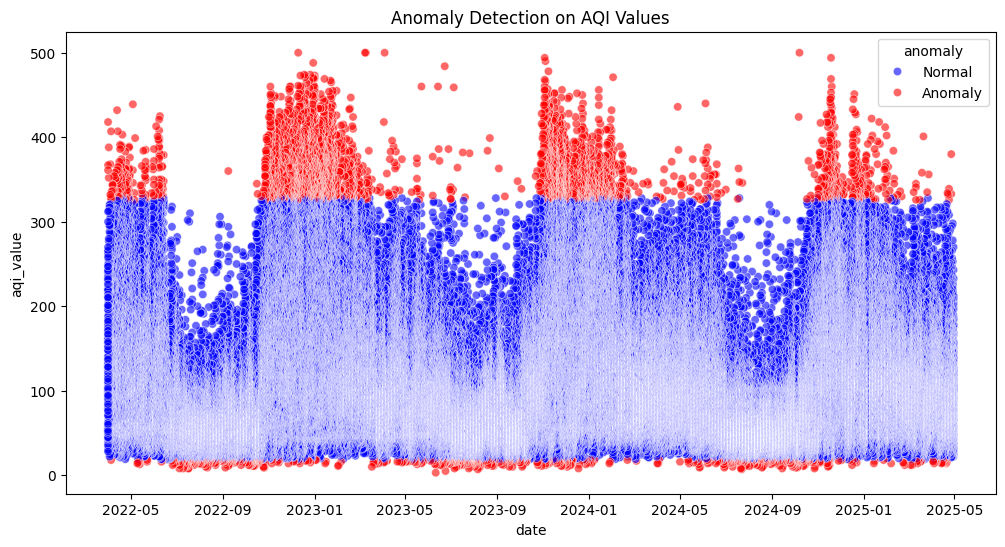

In [28]:
# Visualization

plt.figure(figsize=(12,6))
sns.scatterplot(
    x=aq["date"],
    y=aq["aqi_value"],
    hue=aq["anomaly"],
    palette={'Normal':'blue', 'Anomaly':'red'},
    alpha=0.6
)
plt.title("Anomaly Detection on AQI Values")
plt.show()

# **Classification Models**

In [29]:
#require models libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [30]:
aq.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 235785 entries, 2025-04-30 to 2022-04-01
Data columns (total 8 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   date                           235785 non-null  datetime64[ns]
 1   state                          235785 non-null  object        
 2   area                           235785 non-null  object        
 3   number_of_monitoring_stations  235785 non-null  int64         
 4   prominent_pollutants           235785 non-null  object        
 5   aqi_value                      235785 non-null  int64         
 6   air_quality_status             235785 non-null  object        
 7   anomaly                        235785 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 16.2+ MB


**Features Selection**

In [31]:
#feature and targete variables
x = aq["aqi_value"]
y = aq["air_quality_status"]

In [32]:
y.unique()

array(['Satisfactory', 'Moderate', 'Good', 'Poor', 'Very Poor', 'Severe'],
      dtype=object)

**Encoding Target variable**

In [33]:
en = LabelEncoder()
y_en = en.fit_transform(y)

 **Split Dataset**

In [34]:
# Train-test split 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y_en, test_size=0.2, random_state=42)

# **Random Forest Model**

In [35]:
#creat random forest model
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [36]:
# fit the model
random_forest_model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [37]:
# Predictions
rf_pred = random_forest_model.predict(X_test)

In [38]:
# Evaluation
print("Classification Report:\n", classification_report(y_test, rf_pred, target_names=en.classes_))

Classification Report:
               precision    recall  f1-score   support

        Good       1.00      1.00      1.00      8440
    Moderate       1.00      1.00      1.00     15451
        Poor       1.00      1.00      1.00      4252
Satisfactory       1.00      1.00      1.00     17714
      Severe       1.00      1.00      1.00       118
   Very Poor       1.00      1.00      1.00      1182

    accuracy                           1.00     47157
   macro avg       1.00      1.00      1.00     47157
weighted avg       1.00      1.00      1.00     47157



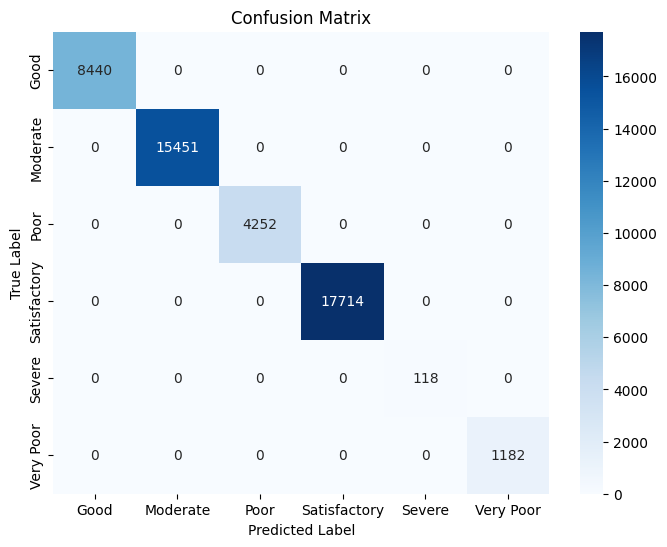

In [39]:
# Confusion Matrix(Evaluation metrics)
cm = confusion_matrix(y_test, rf_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=en.classes_, yticklabels=en.classes_, cmap="Blues")
plt.title("Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

# **Deployment for the Anomaly model (Single Value)**

In [40]:
import gradio as gr


#  Train anomaly model again
anomaly_model = IsolationForest(contamination=0.05, random_state=42)
anomaly_model.fit(aq[["aqi_value"]])
aq["anomaly"] = anomaly_model.predict(aq[["aqi_value"]])
aq["anomaly"] = aq["anomaly"].map({1: "Normal", -1: "Anomaly"})

# Prediction Function for Gradio
def detect_anomaly(aqi_value):
    pred = anomaly_model.predict([[aqi_value]])[0]
    return "Normal" if pred == 1 else "Anomaly"

# Build Gradio Interface
iface = gr.Interface(
    fn=detect_anomaly,
    inputs=gr.Number(label="Enter AQI Value"),
    outputs="text",
    title="AQI Anomaly Detection",
    description="Enter an AQI value and the model will classify it as Normal or Anomaly."
)

iface.launch()


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://ca1b801b65d2d08299.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


# **Deployment for the Anomaly model (csv file)**

In [43]:
import gradio as gr


X = aq[["aqi_value"]]

model = IsolationForest(contamination=0.05, random_state=42)
model.fit(X)

# Function to check anomaly for a single value
def check_single_aqi(aqi_value):
    pred = model.predict([[aqi_value]])[0]
    if pred == 1:
        return {"AQI Value": aqi_value, "Status": "Normal"}
    else:
        return {"AQI Value": aqi_value, "Status": "Anomaly"}

# Function to check anomaly for uploaded CSV file
def check_csv(file):
    df = pd.read_csv(file.name)
    if "aqi_value" not in df.columns:
        return "Error: CSV must contain a column named 'aqi_value'."
    preds = model.predict(df[["aqi_value"]])
    df["Anomaly_Status"] = ["Normal" if p == 1 else "Anomaly" for p in preds]
    return df

# Gradio Interface
with gr.Blocks() as demo:
    gr.Markdown("## 🌍 AQI Anomaly Detection App")

    with gr.Tab("🔹 Single Input"):
        aqi_input = gr.Number(label="Enter AQI Value", value=100)
        result = gr.JSON()
        btn1 = gr.Button("Check")
        btn1.click(check_single_aqi, inputs=aqi_input, outputs=result)

    with gr.Tab("📂 CSV Upload"):
        file_input = gr.File(label="Upload CSV with 'aqi_value' column")
        output_table = gr.Dataframe()
        btn2 = gr.Button("Process File")
        btn2.click(check_csv, inputs=file_input, outputs=output_table)

demo.launch()


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://b2e099b97a0f6ad491.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
